# Decision Tree

- **Cây quyết định** là một chuỗi các câu hỏi "if-else" giúp đưa ra câu trả lời cho vấn đề. 

- Trong học máy, ta sử dụng tập training để xây dựng cấu trúc cây, mỗi nút (node) sẽ là 1 câu hỏi về 1 trong số các **đặc trưng**, từ đó đi xuôi xuống các nhánh cho đến khi có câu trả lời. 

- Ta liên tục chia cây (split) thành các nhánh đến khi các nhãn **sạch (pure)** một cách chấp nhận được. 
Ví dụ, nếu tất cả (hoặc hầu hết) các điểm dữ liệu đều thuộc 1 nhãn **có/không** thì nút này **sạch**, ta không chia cây nữa.

- Việc chia cây thành các nhánh là để tận dụng các đặc trưng có sẵn nhằm giải quyết bài toán của ta.

- Làm thế nào để đo lường độ **sạch**: ta sử dụng một tham số gọi là **impurity score** (độ không sạch).

- **ID3-Algorithms**: Thử tất cả các đặc trưng và các cách chia có thể. Chọn cách chia cây để tối thiểu hóa impurity score, ví dụ, với đặc trưng $x_f$ và ngưỡng $t$, 1 phép chia cây được định nghĩa là:
$$
\begin{bmatrix}
D^L=\left \{ (x,y)\in D: x_f\leq t \right \}\\ 
D^R=\left \{ (x,y)\in D: x_f> t \right \}
\end{bmatrix}
$$

- 2 cách đo impurity scores: Gini và Entropy

### Gini impurity

Cho dataset: $D=\left \{ \left ( \mathbf{x}_1,y_1 \right ),\dots,\left ( \mathbf{x}_m,y_m \right ) \right \}, y_i\in\left \{ 1,\dots,c \right \}$, trong đó $c$ là số lớp.

$D_k\subseteq D$, trong đó $D_k=\left \{ \left ( \mathbf{x},y \right )\in D:y=k \right \}$, do đó $D=D_1\cup \dots \cup D_c$

Gọi

$$
p_k=\frac{\left | D_k \right |}{\left | D \right |}\leftarrow \textrm{tỷ lệ số mẫu trong } D \textrm{ có nhãn là } k
$$

Gini impurity của 1 nút là:

$$
G(D)=\sum_{k=1}^{c}p_k(1-p_k) = \sum_{k=1}^c p_k - \sum_{k=1}^c p_k^2 = 1 - \sum_{k=1}^c p_k^2
$$

Gini impurity của cả cây (con):

$$
G^T(D)=\frac{\left | D_L \right |}{\left | D \right |}G^T(D_L)+\frac{\left | D_R \right |}{\left | D \right |}G^T(D_R)
$$

trong đó:
* $\left ( D=D_L\cup D_R \right )$
* $D_L\cap D_R=\varnothing$

**Gini impurity của cả cây (con) là tổng trọng số của Gini impurity 2 cây con trái phải.**

### Entropy

Tương tự, $p_1,\dots,p_k$ như trên. Entropy được định nghĩa là:

$$
H(s) = -\sum_{k}p_klog(p_k)
$$

Entropy cả cây:

$$
H(D)= \frac{\left | D_L \right |}{\left | D \right |} H(D^L)+ \frac{\left | D_R \right |}{\left | D \right |}H(D^R)
$$

Được sử dụng để đo **lượng thông tin thu được** [Information Gain](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees), là hiệu entropy trước và sau khi chia tập dữ liệu $D$ bằng đặc trưng $x_f$ trên cây.

Good tutorial: https://www.youtube.com/watch?v=7VeUPuFGJHk

In [29]:
#@title Import libraries {display-mode: "form"}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [30]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y, draw_vector=True):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    if draw_vector:
        draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)
    
def projection_onto_H(x, w, b):
    ax = plt.gca()
    alpha = (np.dot(x, w) + b) / np.dot(w, w)
    d = alpha * w
    x_projection = x - d
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c='#95a5a6')
    
def plot_margins(X, y, w, b):
    ax = plt.gca()
    gamma = np.abs(np.dot(X, w) + b) / np.sqrt(np.dot(w, w))
    x_pos = X[y==1][np.argmin(gamma[y == 1])]
    x_neg = X[y==0][np.argmin(gamma[y == 0])]
    d_pos = gamma[y==1][np.argmin(gamma[y == 1])]
    d_neg = gamma[y==0][np.argmin(gamma[y == 0])]
    
    ax.scatter([x_pos[0], x_neg[0]],[x_pos[1], x_neg[1]], s=150, linewidth=2, facecolor='none', edgecolors='#2c3e50')
    projection_onto_H(x_pos, w, b)
    projection_onto_H(x_neg, w, b)
    ax.set_title(f'Margin Class +1: {d_pos:.3f}, Class -1: {d_neg:.3f}', fontsize=24)
    
def plot_svc(model, plot_support=True):
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    
    # create grid (coordinate system - x and y) to evaluate model
    x = np.linspace(xlim[0], xlim[1], 40)
    y = np.linspace(ylim[0], ylim[1], 40) 
    X, Y = np.meshgrid(x, y)
    flatten_X = X.ravel() 
    flatten_Y = Y.ravel()
    xy = np.vstack([flatten_X, flatten_Y]).T 
    Z = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins.
    ax.contour(X, Y, Z, colors='k', # draw filled contours
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    
    # plot circle around the support vectors returned by fitted SVC model
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1],
                   s=150, linewidth=2, facecolors='none', edgecolors='k')
        
def plot_hyperplane(w, b):
    ax = plt.gca()
    draw_vectors(np.array([w]), origin=np.array([[(-b/w[0]), 0]]))
    x_1 = np.linspace(-8, 8, 100)
    ax.plot(x_1, (-w[0]/w[1])*x_1 + (-b/w[1]))

def visualize_classifier(model, X, y, ax=None, cmap='viridis'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Examples

**Titanic dataset**

In [31]:
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
# Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)

X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']]
y = titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [32]:
print(X_train)

     Pclass  Sex        Age  FamilySize
190       2    1  32.000000           1
456       1    0  65.000000           1
853       1    1  16.000000           2
374       3    1   3.000000           5
333       3    0  16.000000           3
..      ...  ...        ...         ...
626       2    0  57.000000           1
242       2    0  29.000000           1
590       3    0  35.000000           1
755       2    0   0.670000           3
256       1    1  29.699118           1

[712 rows x 4 columns]


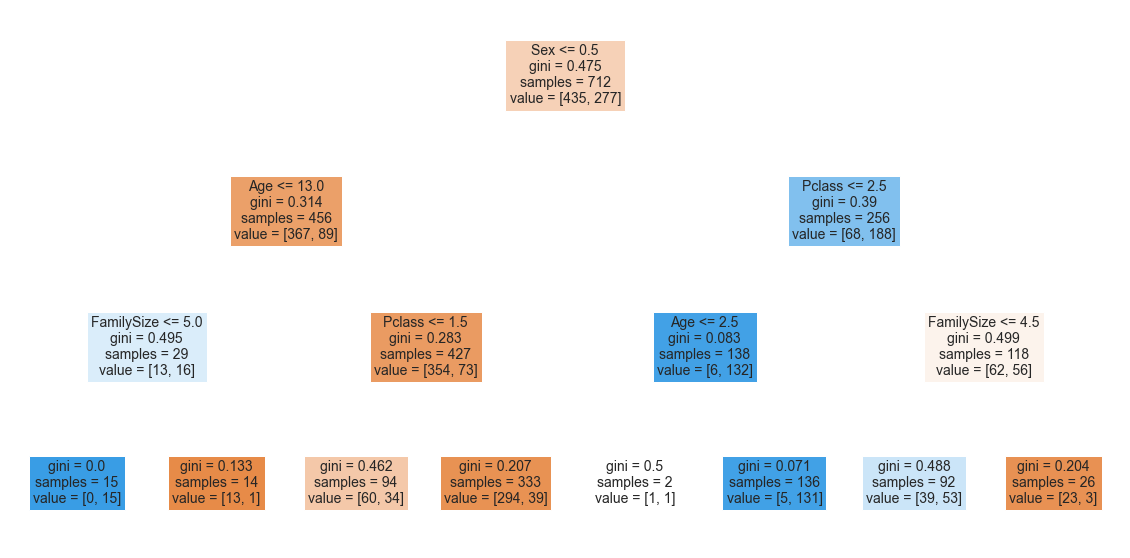

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3, criterion='gini').fit(X_train, y_train)  # criterion = 'gini' or 'entropy'

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14, feature_names=['Pclass', 'Sex', 'Age', 'FamilySize'])
plt.show()

In [34]:
print(X_train[X_train["Sex"]==0])

     Pclass  Sex        Age  FamilySize
456       1    0  65.000000           1
333       3    0  16.000000           3
538       3    0  29.699118           1
20        2    0  35.000000           1
223       3    0  29.699118           1
..      ...  ...        ...         ...
834       3    0  18.000000           1
626       2    0  57.000000           1
242       2    0  29.000000           1
590       3    0  35.000000           1
755       2    0   0.670000           3

[456 rows x 4 columns]


In [35]:
print(clf.predict(X_test))

[1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       115
           1       0.77      0.78      0.78        64

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



https://datascience.stackexchange.com/questions/56013/how-does-decision-tree-with-gini-impurity-calculate-root-node

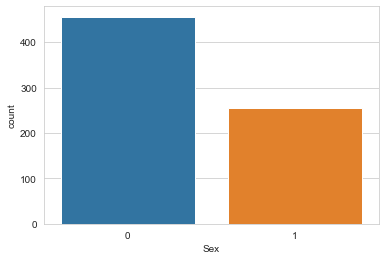

In [37]:
sns.countplot(x='Sex', data=X_train)

In [38]:
X_train[(X_train['Age']<=13) & (X_train['Sex']==1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 374 to 43
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      29 non-null     int64  
 1   Sex         29 non-null     int64  
 2   Age         29 non-null     float64
 3   FamilySize  29 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


**Random 2-dimensional data**

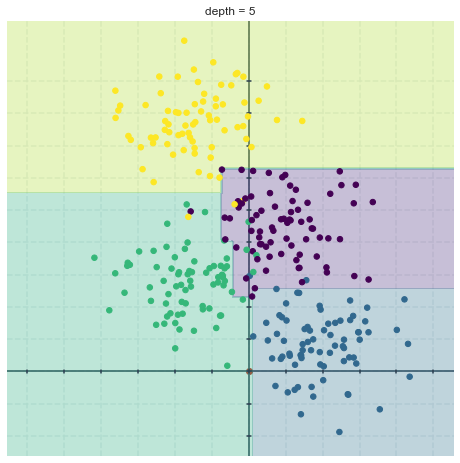

In [39]:
from sklearn.datasets import make_blobs

# make_blobs là thư viện giúp tạo các nhóm (cluster) dữ liệu.
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

depth = 5
clf = DecisionTreeClassifier(max_depth=depth)
visualize_classifier(clf, X, y)
plt.title('depth = {0}'.format(depth))

plt.show()

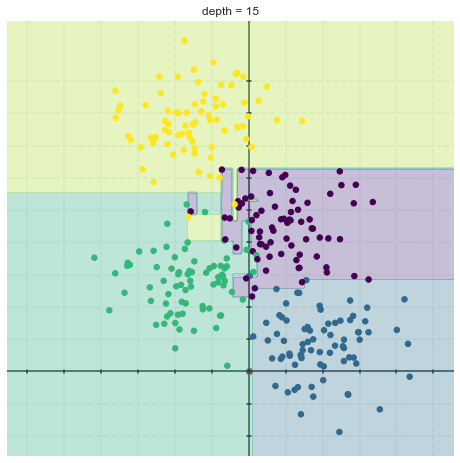

In [40]:
from sklearn.datasets import make_blobs

# make_blobs là thư viện giúp tạo các nhóm (cluster) dữ liệu.
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

depth = 15 # khá cao
clf = DecisionTreeClassifier(max_depth=depth)
visualize_classifier(clf, X, y)
plt.title('depth = {0}'.format(depth))

plt.show()

Khi tăng `depth`, có thể thấy hình dạng các vùng phân biệt khá kì lạ. Có những vùng rất nhỏ của lớp này xuất hiện trong vùng lớn của lớp khác.

Đó là do khi tăng `depth`, cây sâu hơn, đồng nghĩa với việc cây nhiều nhánh hơn. Khi càng phân nhánh, ta càng chia nhỏ tập dữ liệu ban đầu, do vậy cây càng sâu, lượng dữ liệu ở các lá càng ít -> cây sẽ chỉ "học thuộc lòng" số ít dữ liệu đó.

-> Tính khái quát (generalization) của mô hình sẽ giảm đi -> **overfitting**.

Tham số `depth` khi xây dựng cây rất quan trọng để kiểm soát overfitting.

Bạn có thể nhìn m phía dưới để thấy càng xuống sâu, `samples` (lượng dữ liệu ở các lá) càng nhỏ.

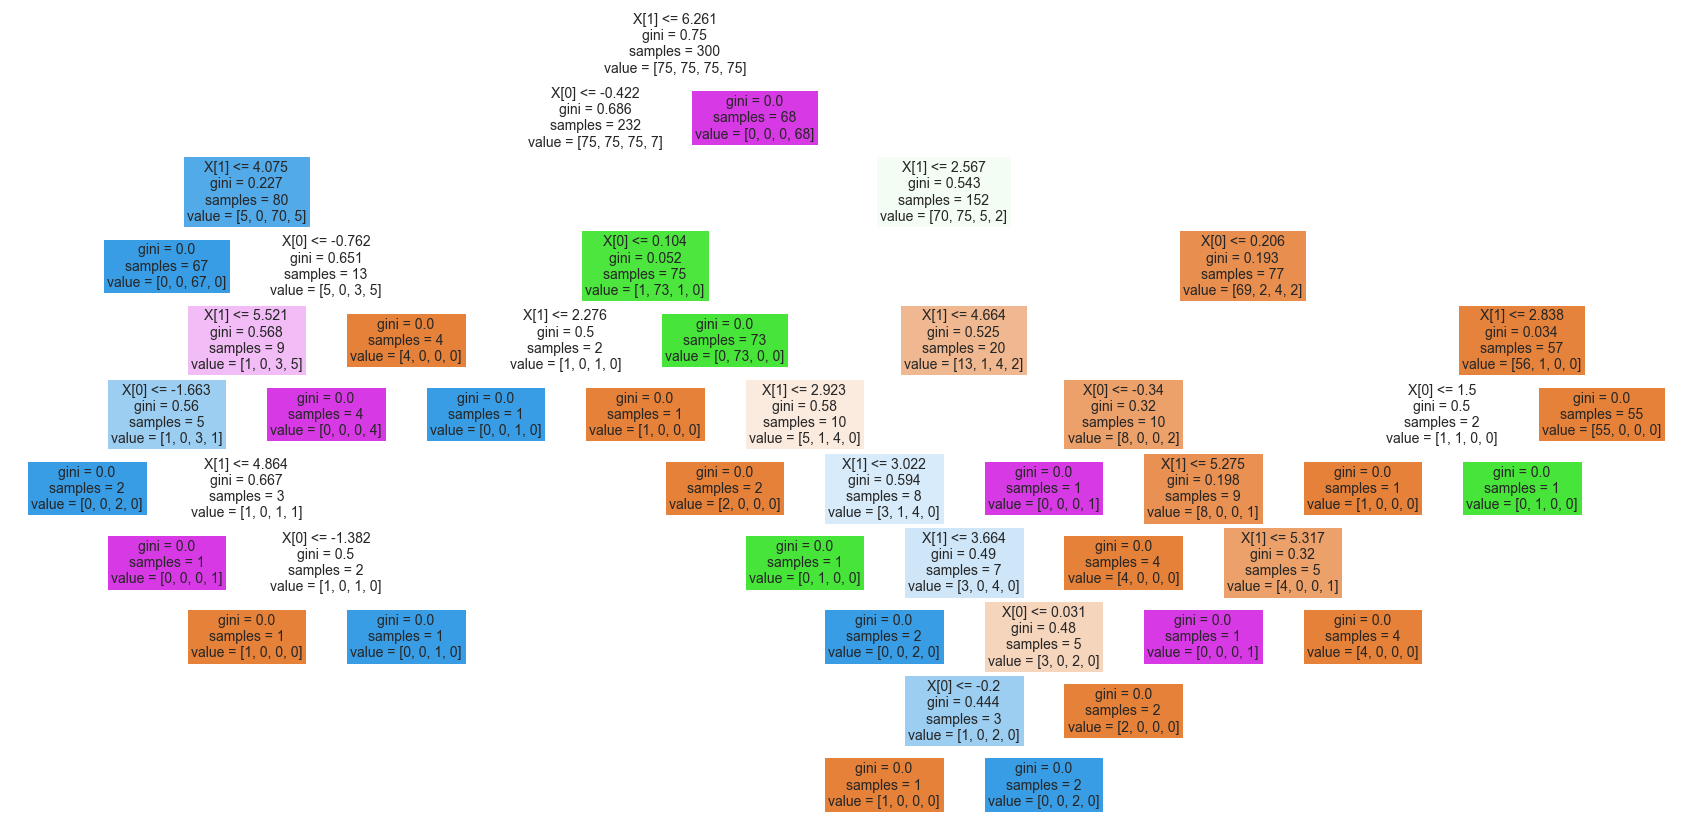

In [41]:
plt.figure(figsize=(30,15))
plot_tree(clf, filled=True, fontsize=14)
plt.show()

### Max depths of Decision Tree - Overfitting and Underfitting

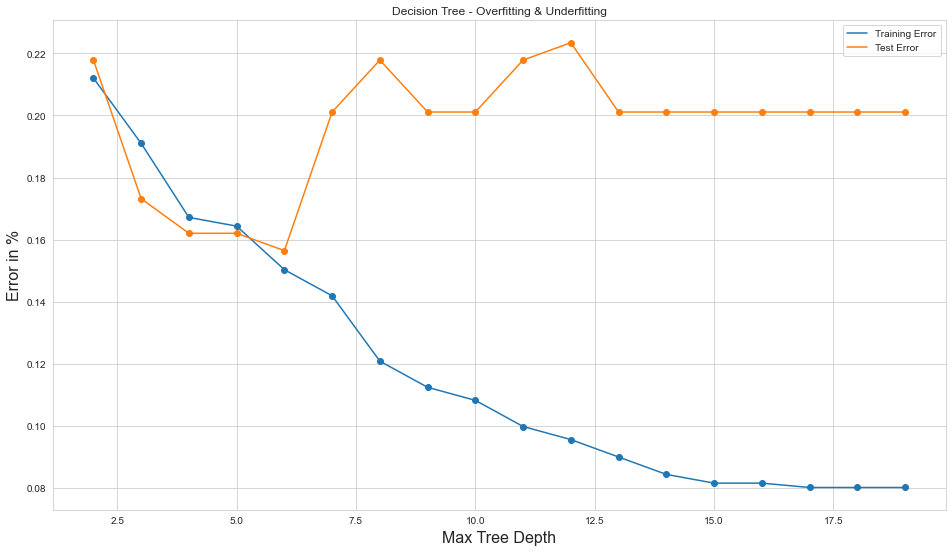

In [53]:
from sklearn.metrics import accuracy_score

max_depths = np.arange(2, 20)
train_errors = []
test_errors = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, dt_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize=(16, 9))
plt.scatter(max_depths, train_errors)
plt.plot(max_depths, train_errors, label='Training Error')
plt.scatter(max_depths, test_errors)
plt.plot(max_depths, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Max Tree Depth', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.show()